In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading all files

In [341]:
data=pd.read_csv('train.csv')
#print(data.head().T)

In [342]:
test_data=pd.read_csv('test.csv')
#print(data.head().T)

In [343]:
#test_data.isnull().sum()

In [344]:
"""
#training data..............................
data['Year'] = pd.DatetimeIndex(data['DateTime']).year  
data['Month']=pd.DatetimeIndex(data['DateTime']).month
data['Day']=pd.DatetimeIndex(data['DateTime']).day
data['Hour']=pd.DatetimeIndex(data['DateTime']).hour
data['Minute']=pd.DatetimeIndex(data['DateTime']).minute
data.head()

#testing data............................

test_data['Year'] = pd.DatetimeIndex(test_data['DateTime']).year  
test_data['Month']=pd.DatetimeIndex(test_data['DateTime']).month
test_data['Day']=pd.DatetimeIndex(test_data['DateTime']).day
test_data['Hour']=pd.DatetimeIndex(test_data['DateTime']).hour
test_data['Minute']=pd.DatetimeIndex(test_data['DateTime']).minute
"""


"\n#training data..............................\ndata['Year'] = pd.DatetimeIndex(data['DateTime']).year  \ndata['Month']=pd.DatetimeIndex(data['DateTime']).month\ndata['Day']=pd.DatetimeIndex(data['DateTime']).day\ndata['Hour']=pd.DatetimeIndex(data['DateTime']).hour\ndata['Minute']=pd.DatetimeIndex(data['DateTime']).minute\ndata.head()\n\n#testing data............................\n\ntest_data['Year'] = pd.DatetimeIndex(test_data['DateTime']).year  \ntest_data['Month']=pd.DatetimeIndex(test_data['DateTime']).month\ntest_data['Day']=pd.DatetimeIndex(test_data['DateTime']).day\ntest_data['Hour']=pd.DatetimeIndex(test_data['DateTime']).hour\ntest_data['Minute']=pd.DatetimeIndex(test_data['DateTime']).minute\n"

# EDA

In [345]:
#get columnms name
columns_name=data.columns.values
#print(columns_name)
#print(data.info())

In [346]:
missing_data=pd.DataFrame({'missing':data.isnull().sum()})
#print(missing_data)
statistical_description=data.describe()
#print(statistical_description)
data_shape=data.shape
#print("The shape of data {}".format(data_shape))

# DECISIONS

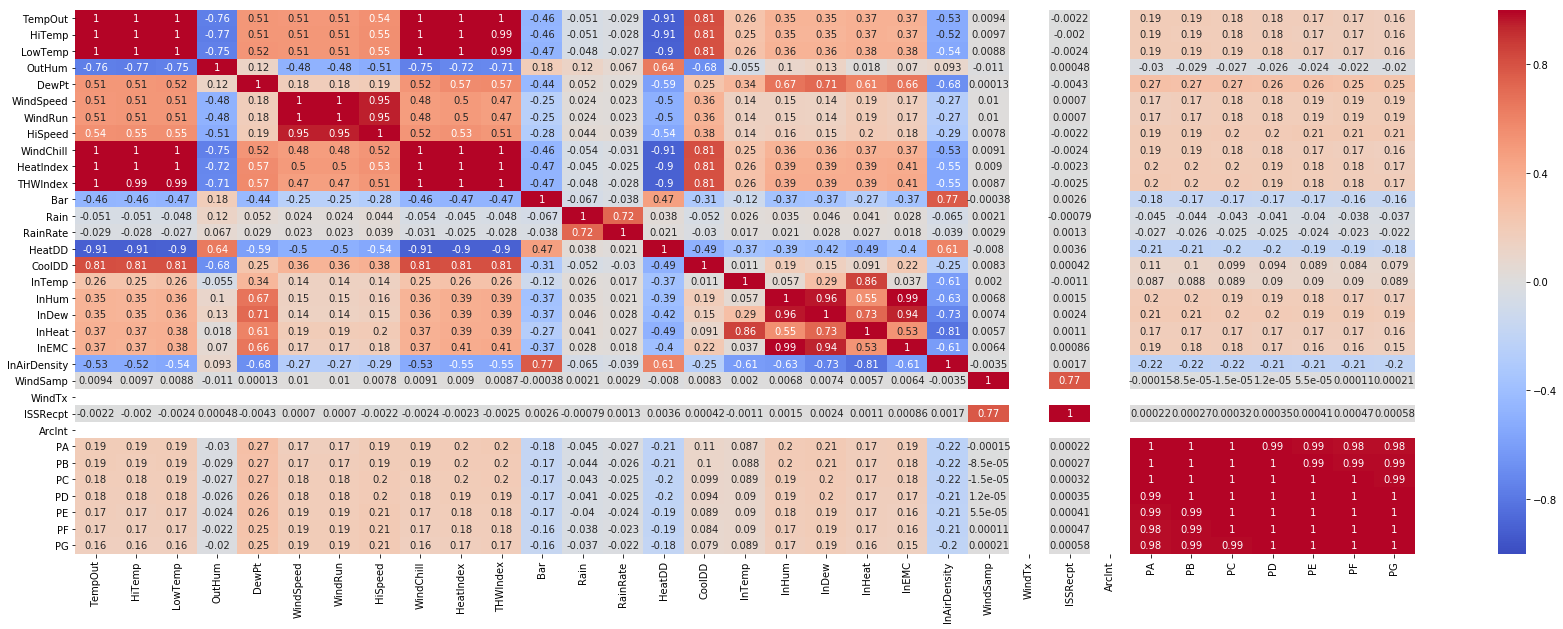

In [347]:


#Knowing the sub-oka format...
sub_oka=pd.read_csv('sample.csv')
#print(sub_oka.head())

#selecting the categorical values columns
categorical=data.select_dtypes(include=['object'])
#print(categorical.shape)
#print(categorical)

"""
#finding correlation matrix...
correlation_of_data=data.corr()
plt.figure(figsize=(30,15))
sns.heatmap(correlation_of_data,annot=True)
"""
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

In [348]:
data=data.drop(['DateTime','WindSamp', 'WindTx' ,'ISSRecpt', 'ArcInt','WindSpeed','WindDir','WindRun','HiDir','Rain'],axis=1)
test_data=test_data.drop(['DateTime','WindSamp', 'WindTx' ,'ISSRecpt', 'ArcInt','WindSpeed','WindDir','WindRun','HiDir','Rain'],axis=1)
#firstly printed dataset columns
print(data.columns.values)

['ID' 'TempOut' 'HiTemp' 'LowTemp' 'OutHum' 'DewPt' 'HiSpeed' 'WindChill'
 'HeatIndex' 'THWIndex' 'Bar' 'RainRate' 'HeatDD' 'CoolDD' 'InTemp'
 'InHum' 'InDew' 'InHeat' 'InEMC' 'InAirDensity' 'PA' 'PB' 'PC' 'PD' 'PE'
 'PF' 'PG']


/home/bjit-532/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


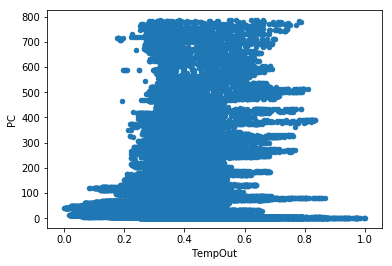

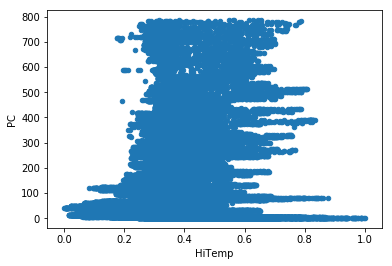

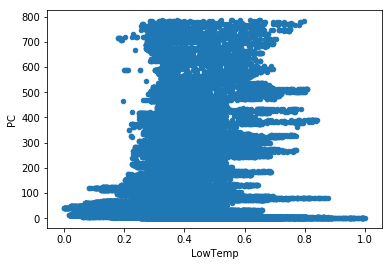

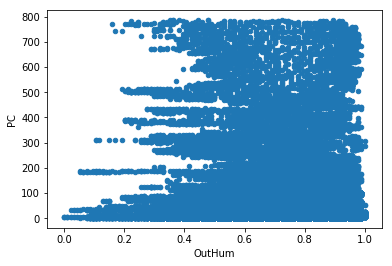

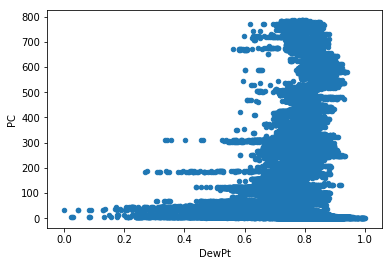

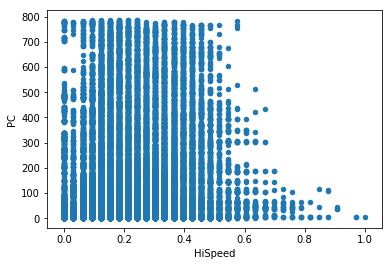

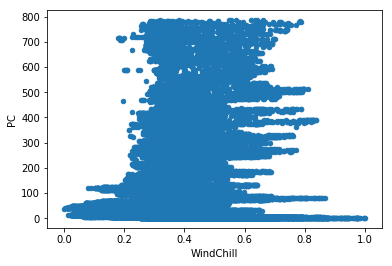

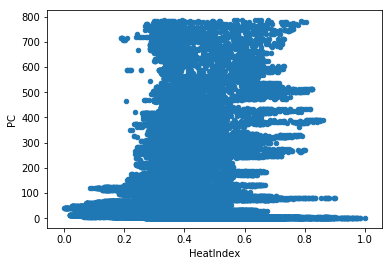

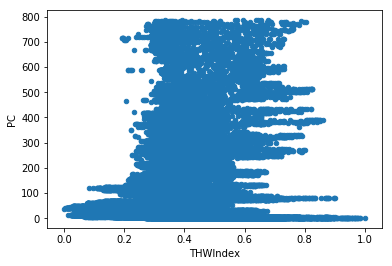

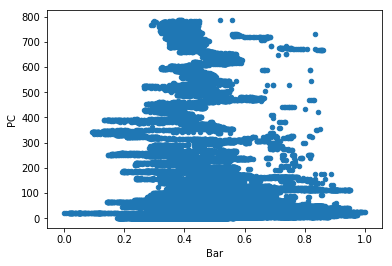

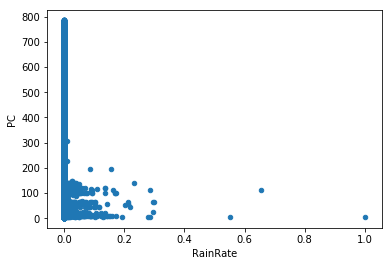

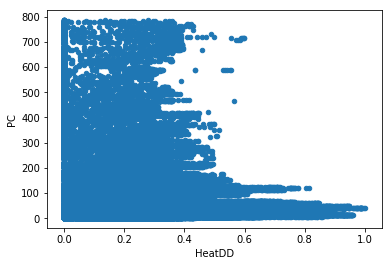

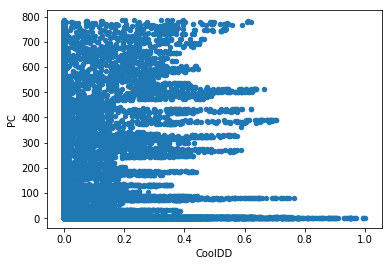

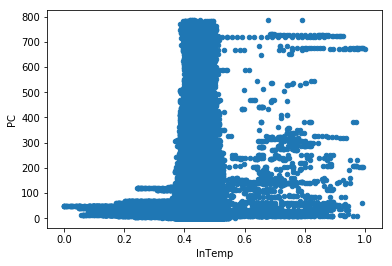

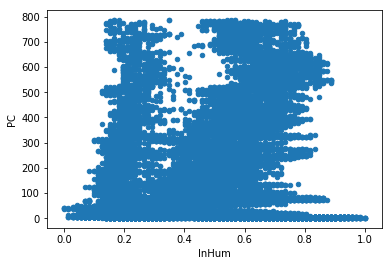

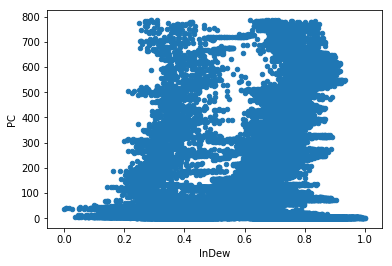

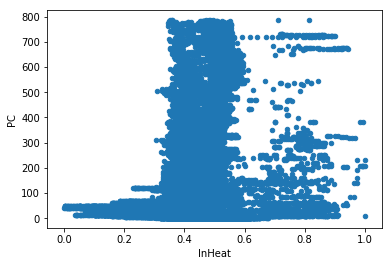

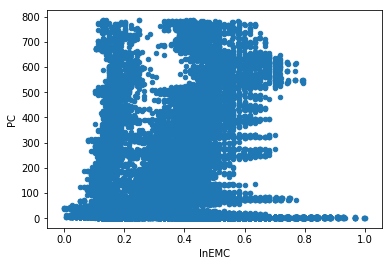

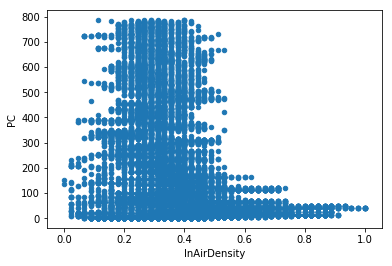

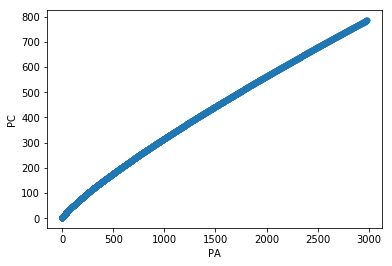

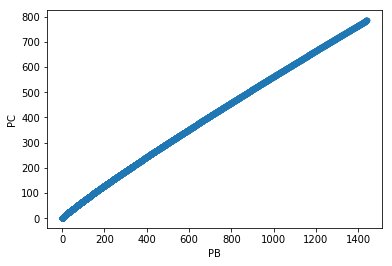

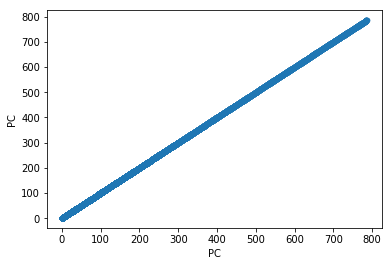

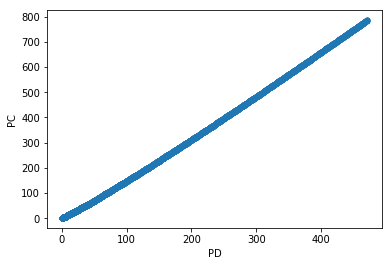

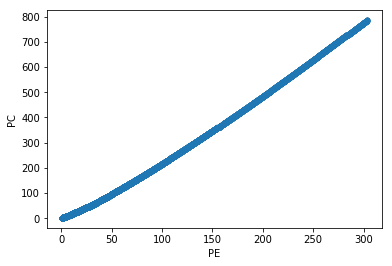

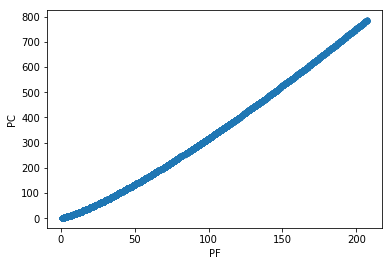

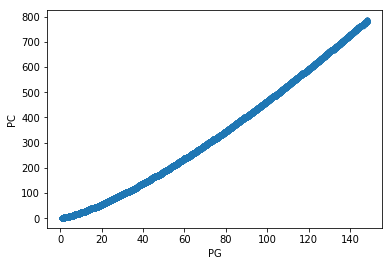

In [362]:



#plotting all columns of dataset using "PA"

columns=list(data.columns.values)
#print(columns)

target_list=['PA', 'PB', 'PC', 'PD', 'PE', 'PF', 'PG']


for i in range(1,len(columns)):
     data.plot.scatter(x=columns[i],y=target_list[2])

  
        


   
    


In [350]:
print(data.head().T)
print(test_data.head().T)


                    0        1        2        3        4
ID            PR00001  PR00002  PR00003  PR00004  PR00005
TempOut          53.5     53.5     53.3     53.1     52.9
HiTemp           53.6     53.5     53.5     53.3     53.1
LowTemp          53.5     53.4     53.2       53     52.9
OutHum             85       85       85       86       86
DewPt            49.1     49.1     48.9       49     48.8
HiSpeed             9        7        7        5        6
WindChill        53.5     53.5     53.3     53.1     52.9
HeatIndex        53.4     53.4     53.2       53     52.9
THWIndex         53.4     53.4     53.2       53     52.9
Bar            29.951   29.955   29.954   29.956   29.959
RainRate            0        0        0        0        0
HeatDD           0.12     0.12    0.122    0.124    0.126
CoolDD              0        0        0        0        0
InTemp           70.2     69.3     68.4     69.8       71
InHum              50       27       53       50       48
InDew         

In [351]:
print(data.columns.values)
print(test_data.columns.values)

['ID' 'TempOut' 'HiTemp' 'LowTemp' 'OutHum' 'DewPt' 'HiSpeed' 'WindChill'
 'HeatIndex' 'THWIndex' 'Bar' 'RainRate' 'HeatDD' 'CoolDD' 'InTemp'
 'InHum' 'InDew' 'InHeat' 'InEMC' 'InAirDensity' 'PA' 'PB' 'PC' 'PD' 'PE'
 'PF' 'PG']
['ID' 'TempOut' 'HiTemp' 'LowTemp' 'OutHum' 'DewPt' 'HiSpeed' 'WindChill'
 'HeatIndex' 'THWIndex' 'Bar' 'RainRate' 'HeatDD' 'CoolDD' 'InTemp'
 'InHum' 'InDew' 'InHeat' 'InEMC' 'InAirDensity']


In [352]:
"""
 Normalize korle 98% asey



"""




#normalize the column values................
from sklearn.preprocessing import MinMaxScaler
column_names_to_normalize = ['TempOut', 'HiTemp', 'LowTemp', 'OutHum' ,'DewPt' ,'WindChill',
 'HeatIndex' ,'THWIndex', 'Bar', 'RainRate', 'HeatDD', 'CoolDD', 'InTemp',
 'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity','HiSpeed']
min_max_scaler=MinMaxScaler() 
x = data[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
data_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = data.index)
data[column_names_to_normalize] = data_temp

print(data['Bar'])

#normalize the column values of test data..

column_names_to_normalize = ['TempOut', 'HiTemp', 'LowTemp', 'OutHum' ,'DewPt' ,'WindChill',
 'HeatIndex' ,'THWIndex', 'Bar', 'RainRate', 'HeatDD', 'CoolDD', 'InTemp',
 'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity','HiSpeed']

min_max_scaler=MinMaxScaler() 
x = test_data[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
test_data_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = test_data.index)
test_data[column_names_to_normalize] = test_data_temp

0        0.362842
1        0.367213
2        0.366120
3        0.368306
4        0.371585
5        0.369399
6        0.367213
7        0.372678
8        0.371585
9        0.365027
10       0.360656
11       0.368306
12       0.370492
13       0.367213
14       0.360656
15       0.366120
16       0.366120
17       0.366120
18       0.356284
19       0.359563
20       0.368306
21       0.372678
22       0.380328
23       0.375956
24       0.383607
25       0.389071
26       0.394536
27       0.394536
28       0.402186
29       0.404372
           ...   
39970    0.358470
39971    0.422951
39972    0.431694
39973    0.438251
39974    0.446995
39975    0.446995
39976    0.419672
39977    0.404372
39978    0.348634
39979    0.354098
39980    0.360656
39981    0.360656
39982    0.380328
39983    0.383607
39984    0.389071
39985    0.390164
39986    0.393443
39987    0.391257
39988    0.393443
39989    0.393443
39990    0.392350
39991    0.391257
39992    0.386885
39993    0.390164
39994    0

In [353]:
#print(data['Bar'])

In [354]:
pa=data['PA']
pb=data['PB']
pc=data['PC']
pd=data['PD']
pe=data['PE']
pf=data['PF']
pg=data['PG']

training_data=data
training_data=training_data.drop(['ID','PA','PB', 'PC', 'PD', 'PE', 'PF', 'PG'],axis=1)
print(training_data.columns.values)

['TempOut' 'HiTemp' 'LowTemp' 'OutHum' 'DewPt' 'HiSpeed' 'WindChill'
 'HeatIndex' 'THWIndex' 'Bar' 'RainRate' 'HeatDD' 'CoolDD' 'InTemp'
 'InHum' 'InDew' 'InHeat' 'InEMC' 'InAirDensity']


In [355]:


#predicting PA for the dataset
from sklearn.linear_model import LinearRegression
pa_regression_model = LinearRegression()
pa_regression_model.fit(training_data, pa)

pb_regression_model = LinearRegression()
pb_regression_model.fit(training_data, pb)


pc_regression_model = LinearRegression()
pc_regression_model.fit(training_data, pc)

pd_regression_model = LinearRegression()
pd_regression_model.fit(training_data, pd)

pe_regression_model = LinearRegression()
pe_regression_model.fit(training_data, pe)

pf_regression_model = LinearRegression()
pf_regression_model.fit(training_data, pf)

pg_regression_model = LinearRegression()
pg_regression_model.fit(training_data, pg)


"""
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
pa_poly = poly_reg.fit_transform(training_data)
pa_pol_reg = LinearRegression()
pa_pol_reg.fit(pa_poly, pa)


poly_reg = PolynomialFeatures(degree=2)
pb_poly = poly_reg.fit_transform(training_data)
pb_pol_reg = LinearRegression()
pb_pol_reg.fit(pb_poly, pb)


poly_reg = PolynomialFeatures(degree=2)
pc_poly = poly_reg.fit_transform(training_data)
pc_pol_reg = LinearRegression()
pc_pol_reg.fit(pc_poly, pc)


poly_reg = PolynomialFeatures(degree=2)
pd_poly = poly_reg.fit_transform(training_data)
pd_pol_reg = LinearRegression()
pd_pol_reg.fit(pd_poly, pd)


poly_reg = PolynomialFeatures(degree=2)
pe_poly = poly_reg.fit_transform(training_data)
pe_pol_reg = LinearRegression()
pe_pol_reg.fit(pe_poly, pe)

poly_reg = PolynomialFeatures(degree=2)
pf_poly = poly_reg.fit_transform(training_data)
pf_pol_reg = LinearRegression()
pf_pol_reg.fit(pf_poly, pf)

poly_reg = PolynomialFeatures(degree=2)
pg_poly = poly_reg.fit_transform(training_data)
pg_pol_reg = LinearRegression()
pg_pol_reg.fit(pg_poly, pg)





"""

'\nfrom sklearn.preprocessing import PolynomialFeatures\npoly_reg = PolynomialFeatures(degree=2)\npa_poly = poly_reg.fit_transform(training_data)\npa_pol_reg = LinearRegression()\npa_pol_reg.fit(pa_poly, pa)\n\n\npoly_reg = PolynomialFeatures(degree=2)\npb_poly = poly_reg.fit_transform(training_data)\npb_pol_reg = LinearRegression()\npb_pol_reg.fit(pb_poly, pb)\n\n\npoly_reg = PolynomialFeatures(degree=2)\npc_poly = poly_reg.fit_transform(training_data)\npc_pol_reg = LinearRegression()\npc_pol_reg.fit(pc_poly, pc)\n\n\npoly_reg = PolynomialFeatures(degree=2)\npd_poly = poly_reg.fit_transform(training_data)\npd_pol_reg = LinearRegression()\npd_pol_reg.fit(pd_poly, pd)\n\n\npoly_reg = PolynomialFeatures(degree=2)\npe_poly = poly_reg.fit_transform(training_data)\npe_pol_reg = LinearRegression()\npe_pol_reg.fit(pe_poly, pe)\n\npoly_reg = PolynomialFeatures(degree=2)\npf_poly = poly_reg.fit_transform(training_data)\npf_pol_reg = LinearRegression()\npf_pol_reg.fit(pf_poly, pf)\n\npoly_reg = 

In [356]:
test_data_id=test_data['ID'].tolist()
test_data=test_data.drop(['ID'],axis=1)
#test_data is ok now for predicting
#test_data.head().T

In [357]:
def replace(num_list):
    new_list=[]
    for num in num_list:
        if num<0:
            num=0
        new_list.append(num)
    return new_list
        

In [358]:

predict_pa=pa_regression_model.predict(test_data).tolist()
predict_pb=pb_regression_model.predict(test_data).tolist()
predict_pc=pc_regression_model.predict(test_data).tolist()
predict_pd=pd_regression_model.predict(test_data).tolist()
predict_pe=pe_regression_model.predict(test_data).tolist()
predict_pf=pf_regression_model.predict(test_data).tolist()
predict_pg=pg_regression_model.predict(test_data).tolist()


"""
predict_pa=pa_pol_reg.predict(test_data).tolist()
predict_pb=pb_pol_reg.predict(test_data).tolist()
predict_pc=pc_pol_reg.predict(test_data).tolist()
predict_pd=pd_pol_reg.predict(test_data).tolist()
predict_pe=pe_pol_reg.predict(test_data).tolist()
predict_pf=pf_pol_reg.predict(test_data).tolist()
predict_pg=pg_pol_reg.predict(test_data).tolist()
"""



predict_pa = [round(x) for x in predict_pa]

predict_pb = [round(x) for x in predict_pb]

predict_pc = [round(x) for x in predict_pc]

predict_pd = [round(x) for x in predict_pd]

predict_pe = [round(x) for x in predict_pe]

predict_pf = [round(x) for x in predict_pf]

predict_pg = [round(x) for x in predict_pg]






In [359]:
import pandas as pd
subm=pd.DataFrame({'ID':test_data_id,'PA':predict_pa,'PB':predict_pb,'PC':predict_pc,'PD':predict_pd,'PE':predict_pe,'PF':predict_pf,'PG':predict_pg})


subm['PA']=subm['PA'].abs()
subm['PB']=subm['PB'].abs()
subm['PC']=subm['PC'].abs()
subm['PD']=subm['PD'].abs()
subm['PE']=subm['PE'].abs()
subm['PF']=subm['PF'].abs()
subm['PG']=subm['PG'].abs()


subm.to_csv('output.csv',index=False)


In [360]:
ans=pd.read_csv('output.csv')
ans.head()

,ID,PA,PB,PC,PD,PE,PF,PG
0,PR40001,360,196,118,76,51,37,26
1,PR40002,604,321,189,120,81,57,42
2,PR40003,237,132,81,53,36,26,18
3,PR40004,383,208,125,81,55,39,28
4,PR40005,369,208,128,85,59,43,31


In [361]:
ans.isnull().sum()

ID    0
PA    0
PB    0
PC    0
PD    0
PE    0
PF    0
PG    0
dtype: int64